In [ ]:
from google.colab import files
upload = files.upload()

Saving HW3_Airfares_Selected.csv to HW3_Airfares_Selected.csv


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('HW3_Airfares_Selected.csv')

df.isnull().sum()
DV = 'FARE'
df_1 = df.dropna(subset=[DV])
print(df_1) 

    VACATION   SW  S_INCOME  ...         GATE  DISTANCE    FARE
0         No  Yes     28637  ...         Free       312   64.11
1         No   No     26993  ...         Free       576  174.47
2         No   No     30124  ...         Free       364  207.76
3         No  Yes     29260  ...         Free       612   85.47
4         No  Yes     29260  ...         Free       612   85.47
..       ...  ...       ...  ...          ...       ...     ...
631      Yes   No     32991  ...         Free      1030  129.63
632      Yes   No     32991  ...  Constrained      1030  129.63
633      Yes   No     27994  ...         Free       960  124.87
634      Yes   No     31981  ...         Free       858  129.62
635      Yes   No     31981  ...         Free       858  129.62

[636 rows x 10 columns]


          S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE      FARE
S_INCOME  1.000000 -0.140002  0.516779 -0.272888  0.030438  0.208563
E_INCOME -0.140002  1.000000 -0.146626  0.458060  0.179154  0.326739
S_POP     0.516779 -0.146626  1.000000 -0.281467  0.021207  0.145000
E_POP    -0.272888  0.458060 -0.281467  1.000000  0.116757  0.285264
DISTANCE  0.030438  0.179154  0.021207  0.116757  1.000000  0.672640
FARE      0.208563  0.326739  0.145000  0.285264  0.672640  1.000000


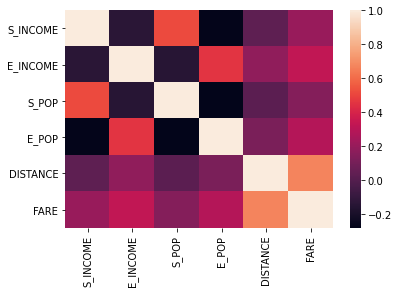

In [ ]:
df4heatmaps = df


# Compute the correlation matrix 
corr = df4heatmaps.corr()
# Print the correlation matrix
print(corr)
# Draw the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
cvar_list = ['VACATION', 'SW', 'SLOT', 'GATE',  ]
nvar_list = ['FARE', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE' ]

In [ ]:
df_2 = df_1.copy()
df_2[nvar_list] = (df_1[nvar_list] - df_1[nvar_list].mean())/df_1[nvar_list].std()

df_2

,VACATION,SW,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,FARE
0,No,Yes,0.242677,-1.422984,-0.507259,-1.092213,Free,Free,-1.024949,-1.271156
1,No,No,-0.214056,0.468595,-0.342618,1.441319,Free,Free,-0.616284,0.178752
2,No,No,0.655793,0.468595,0.405893,1.441319,Free,Free,-0.944455,0.616116
3,No,Yes,0.415758,0.468595,1.084157,1.441319,Controlled,Free,-0.560557,-0.990529
4,No,Yes,0.415758,0.468595,1.084157,1.441319,Free,Free,-0.560557,-0.990529
...,...,...,...,...,...,...,...,...,...,...
631,Yes,No,1.452297,2.102428,1.346689,-0.805279,Controlled,Free,0.086497,-0.410355
632,Yes,No,1.452297,2.102428,1.346689,-0.805279,Free,Constrained,0.086497,-0.410355
633,Yes,No,0.064040,2.102428,0.127371,-0.805279,Free,Free,-0.021861,-0.472892
634,Yes,No,1.171701,2.102428,-0.004944,-0.805279,Free,Free,-0.179755,-0.410487


In [ ]:
df_3 = df_2.copy()

df_3[cvar_list] = df_2[cvar_list].astype('category')
df_3[nvar_list] = df_2[nvar_list].astype('float64')
df_4 = df_3.copy()


df_4 = pd.get_dummies(df_3, prefix_sep='_')
df_4

,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,FARE,VACATION_No,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free
0,0.242677,-1.422984,-0.507259,-1.092213,-1.024949,-1.271156,1,0,0,1,0,1,0,1
1,-0.214056,0.468595,-0.342618,1.441319,-0.616284,0.178752,1,0,1,0,0,1,0,1
2,0.655793,0.468595,0.405893,1.441319,-0.944455,0.616116,1,0,1,0,0,1,0,1
3,0.415758,0.468595,1.084157,1.441319,-0.560557,-0.990529,1,0,0,1,1,0,0,1
4,0.415758,0.468595,1.084157,1.441319,-0.560557,-0.990529,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,1.452297,2.102428,1.346689,-0.805279,0.086497,-0.410355,0,1,1,0,1,0,0,1
632,1.452297,2.102428,1.346689,-0.805279,0.086497,-0.410355,0,1,1,0,0,1,1,0
633,0.064040,2.102428,0.127371,-0.805279,-0.021861,-0.472892,0,1,1,0,0,1,0,1
634,1.171701,2.102428,-0.004944,-0.805279,-0.179755,-0.410487,0,1,1,0,0,1,0,1


In [ ]:
rdummies=['VACATION_No', 'SW_No','SLOT_Free', 'GATE_Constrained' ]
df_5 = df_4.copy()
df_5 = df_4.drop(columns=rdummies)
print(df_5)


     S_INCOME  E_INCOME     S_POP  ...  SW_Yes  SLOT_Controlled  GATE_Free
0    0.242677 -1.422984 -0.507259  ...       1                0          1
1   -0.214056  0.468595 -0.342618  ...       0                0          1
2    0.655793  0.468595  0.405893  ...       0                0          1
3    0.415758  0.468595  1.084157  ...       1                1          1
4    0.415758  0.468595  1.084157  ...       1                0          1
..        ...       ...       ...  ...     ...              ...        ...
631  1.452297  2.102428  1.346689  ...       0                1          1
632  1.452297  2.102428  1.346689  ...       0                0          0
633  0.064040  2.102428  0.127371  ...       0                0          1
634  1.171701  2.102428 -0.004944  ...       0                0          1
635  1.171701  2.102428 -0.004944  ...       0                1          1

[636 rows x 10 columns]


In [ ]:
from sklearn.model_selection import train_test_split
df_partition=df_5
testpart_size=0.2
df_nontestData, df_testData = train_test_split(df_partition, test_size=testpart_size,random_state=1)


In [ ]:
from sklearn.linear_model import Lasso, LassoCV
DV = 'FARE'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])
alpha = 0.01
clf = Lasso(alpha=alpha, random_state=1).fit(X,y)
clf.coef_
clf.intercept_
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()
print(summary_coef(clf))


                        0
S_INCOME         0.022521
E_INCOME         0.062799
S_POP            0.033497
E_POP            0.054358
DISTANCE         0.600097
VACATION_Yes    -0.592885
SW_Yes          -0.632651
SLOT_Controlled  0.106474
GATE_Free       -0.279766
Intercept        0.539930


In [ ]:
kfolds = 3

# Set n_jobs to be -1 to run LassoCV on all CPU cores.
clf_optimal = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)


# Display the optimal alpha that yields the final selected model (the best model candidate)
print(clf_optimal.alpha_)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))
clf_optimal

0.005661624382946696
                        0
S_INCOME         0.019475
E_INCOME         0.062388
S_POP            0.030709
E_POP            0.049143
DISTANCE         0.605753
VACATION_Yes    -0.614716
SW_Yes          -0.641363
SLOT_Controlled  0.132911
GATE_Free       -0.309793
Intercept        0.564667


LassoCV(alphas=None, copy_X=True, cv=3, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False, positive=False,
        precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
        verbose=False)

In [ ]:
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted = clf.predict(X_test)

# Get the number of obs in the test partition
n_obs_test = df_testData.shape[0]

# Derive ASE over the test partition based on the definition of ASE
ASE_test = sum((y_test_actual - y_test_predicted)**2)/n_obs_test
#print(y_test_actual)
#print(n_obs_test)
print(ASE_test)

0.32721956500281546


In [ ]:
from google.colab import files
upload = files.upload()

Saving newfile2.csv to newfile2.csv


In [ ]:
df_newdata = pd.read_csv('newfile2.csv')

#df_n = df_newdata.copy()
#df_n[nvar_list] = df_newdata[nvar_list].fillna(value=df_newdata[nvar_list].median())

df_newdata.isnull().sum()

VACATION    0
SW          0
S_INCOME    0
E_INCOME    0
S_POP       0
E_POP       0
SLOT        0
GATE        0
DISTANCE    0
dtype: int64

In [ ]:
npredictor_list = nvar_list.copy()
npredictor_list.remove(DV)

#print(npredictor_list)

# Set the datatypes of the variables in the new data
df_newdata_sample1 = df_newdata.copy()
df_newdata_sample1[cvar_list] = df_newdata[cvar_list].astype('category')
df_newdata_sample1[npredictor_list] = df_newdata[npredictor_list].astype('float64')

# Derive the sample mean and the sample standard deviation of the numerical variables in the historical data 
historical_sample_mean = df_1[nvar_list].mean()
historical_sample_std = df_1[nvar_list].std()

# Use the historical sample mean and historical sample standard deviation to standardize the new data
df_newdata_sample2 = df_newdata_sample1.copy()
df_newdata_sample2[npredictor_list] = (df_newdata_sample1[npredictor_list] - historical_sample_mean[npredictor_list])/historical_sample_std[npredictor_list]

# Code the categorical variables in the new data 
df_newdata_sample3 = pd.get_dummies(df_newdata_sample2, prefix_sep='_')

#print(df_newdata_sample3)

In [ ]:
rdummies_newdata=['VACATION_No', 'SW_No','SLOT_Free', 'GATE_Constrained']
df_newdata_sample4 = df_newdata_sample3.drop(columns=rdummies_newdata)
#X=df_newdata_sample4

#print(clf_predict.shape)
#print(df_newdata_sample4 )
#print(df_newdata_sample4.columns.values)

#print(clf_optimal.shape)
predicted_standardizedPrice = clf_optimal.predict(df_newdata_sample4)


# Print the standardized predicted prices for the new data observations
print(predicted_standardizedPrice)

# Convert the standardized predicted prices back to the original predicted prices using the historical sample mean and historical sample standard deviation
predicted_Price = predicted_standardizedPrice * historical_sample_std[DV] + historical_sample_mean[DV]

# Print the predicted prices (in the original dollar amount) for the new data observations 
print(predicted_Price)


[ 1.19943304 -0.92670875]
[252.15925564  90.32768125]
